In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from tensorflow.keras import layers,models, regularizers
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
! pip install -q tensorflow

In [3]:
df = pd.read_csv('Iris.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
df.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

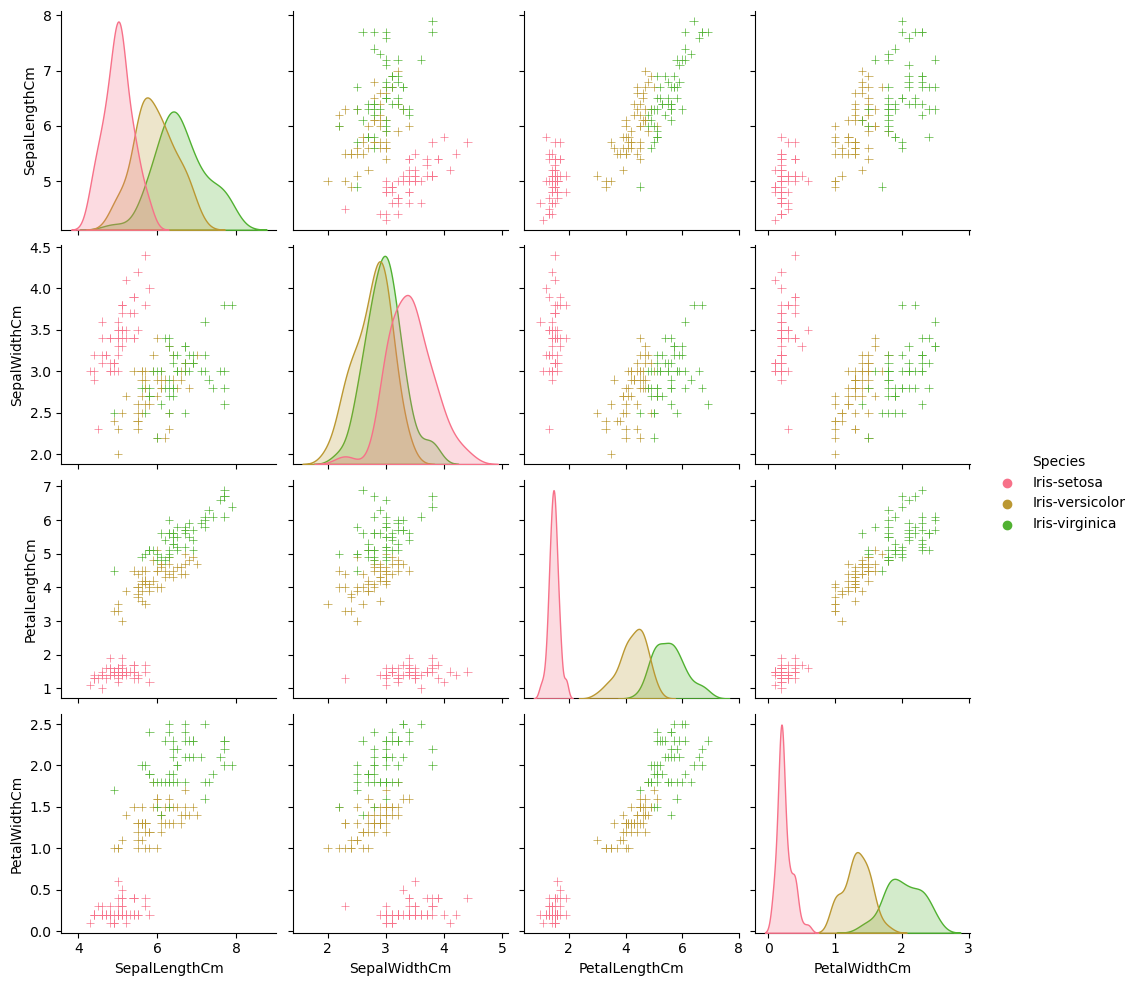

In [6]:
tmp = df.drop('Id', axis=1)
g = sns.pairplot(tmp, hue='Species', markers='+')
plt.show()

Text(0.5, 1.0, 'SepalLength vs SepalWidth')

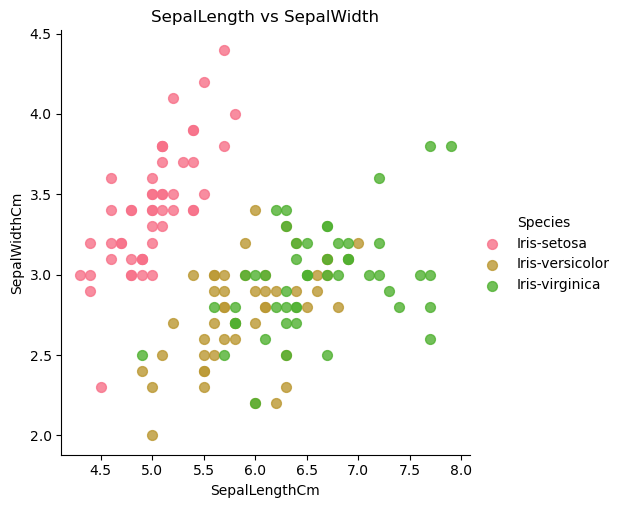

In [7]:
sns.lmplot(x='SepalLengthCm', y='SepalWidthCm',
           data=df,
           fit_reg=False,
           hue="Species",
           scatter_kws={"marker": "D", "s": 50})
plt.title('SepalLength vs SepalWidth')

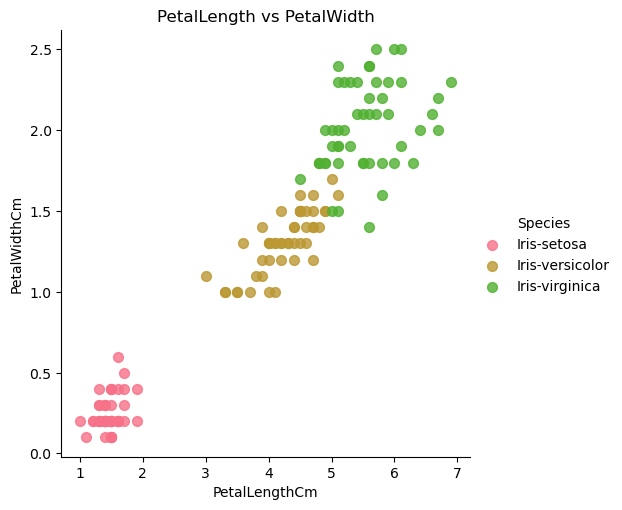

In [8]:
sns.lmplot(x='PetalLengthCm', y='PetalWidthCm',
           data=df,
           fit_reg=False,
           hue="Species",
           scatter_kws={"marker": "D", "s": 50})
plt.title('PetalLength vs PetalWidth')


plt.show()

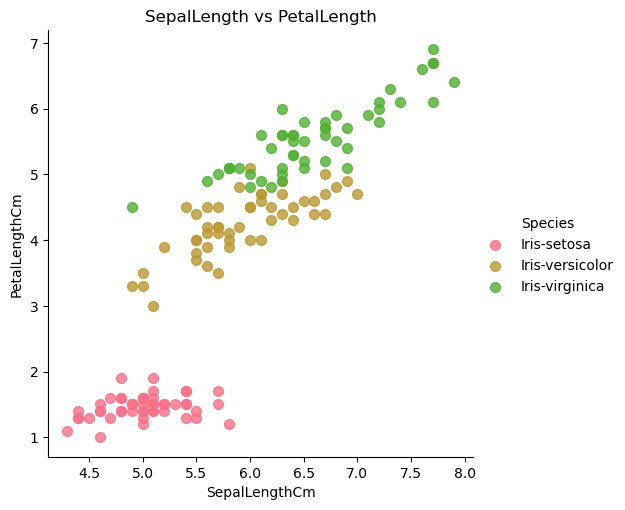

In [9]:
sns.lmplot(x='SepalLengthCm', y='PetalLengthCm',
           data=df,
           fit_reg=False,
           hue="Species",
           scatter_kws={"marker": "D", "s": 50})
plt.title('SepalLength vs PetalLength')

plt.show()

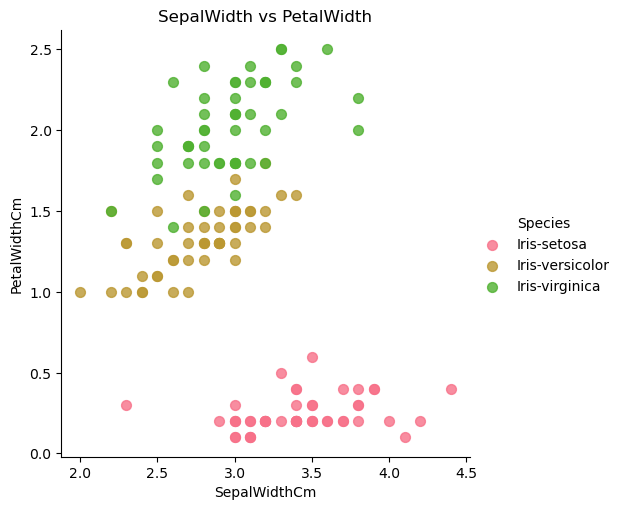

In [10]:
sns.lmplot(x='SepalWidthCm', y='PetalWidthCm',
           data=df,
           fit_reg=False,
           hue="Species",
           scatter_kws={"marker": "D", "s": 50})
plt.title('SepalWidth vs PetalWidth')
plt.show()

In [11]:
new_df = pd.get_dummies(df,columns=['Species'],dtype=np.int32)
new_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_Iris-setosa,Species_Iris-versicolor,Species_Iris-virginica
0,1,5.1,3.5,1.4,0.2,1,0,0
1,2,4.9,3.0,1.4,0.2,1,0,0
2,3,4.7,3.2,1.3,0.2,1,0,0
3,4,4.6,3.1,1.5,0.2,1,0,0
4,5,5.0,3.6,1.4,0.2,1,0,0


In [12]:
new_df[new_df['Species_Iris-setosa'] == 1]['Species_Iris-setosa'].count()

50

In [13]:
x = new_df.iloc[:,1:-3]
y = new_df.iloc[:,-3:]

In [14]:
x.shape

(150, 4)

In [15]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [16]:
x_train.shape[0]

120

In [17]:
x_test.shape[0]

30

In [18]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [19]:
model = models.Sequential()
model.add(layers.Dense(64, activation='tanh',input_dim=4))
model.add(layers.Dense(32, activation='tanh'))
model.add(layers.Dense(3, activation='softmax'))

In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,499 (9.76 KB)

 Trainable params: 2,499 (9.76 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history=model.fit(x_train_scaled, y_train,epochs=200, validation_split=0.2)

Epoch 1/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.2578 - loss: 1.1347 - val_accuracy: 0.5417 - val_loss: 1.0322
Epoch 2/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6836 - loss: 0.9591 - val_accuracy: 0.6667 - val_loss: 0.8917
Epoch 3/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7135 - loss: 0.8047 - val_accuracy: 0.7083 - val_loss: 0.7865
Epoch 4/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7917 - loss: 0.6737 - val_accuracy: 0.7917 - val_loss: 0.7043
Epoch 5/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7812 - loss: 0.6160 - val_accuracy: 0.7917 - val_loss: 0.6356
Epoch 6/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7826 - loss: 0.5306 - val_accuracy: 0.8333 - val_loss: 0.5829
Epoch 7/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7786 - loss: 0.5230 - val_accuracy: 0.8333 - val_loss: 0.5408
Epoch 8/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7852 - loss: 0.4900 - val_accuracy: 0.8333 - val_loss: 0.5066

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9466 - loss: 0.1497 - val_accuracy: 1.0000 - val_loss: 0.1578
Epoch 53/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9583 - loss: 0.1402 - val_accuracy: 1.0000 - val_loss: 0.1545
Epoch 54/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9583 - loss: 0.1324 - val_accuracy: 1.0000 - val_loss: 0.1532
Epoch 55/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9544 - loss: 0.1363 - val_accuracy: 1.0000 - val_loss: 0.1508
Epoch 56/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9544 - loss: 0.1402 - val_accuracy: 1.0000 - val_loss: 0.1467
Epoch 57/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9544 - loss: 0.1366 - val_accuracy: 1.0000 - val_loss: 0.1453
Epoch 58/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9427 - loss: 0.1366 - val_accuracy: 1.0000 - val_loss: 0.1417
Epoch 59/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9544 - loss: 0.1377 - val_accuracy: 1.0000 - val_loss: 0.1376
Epoch

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9635 - loss: 0.0774 - val_accuracy: 1.0000 - val_loss: 0.0626
Epoch 104/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9674 - loss: 0.0679 - val_accuracy: 1.0000 - val_loss: 0.0632
Epoch 105/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9674 - loss: 0.0776 - val_accuracy: 1.0000 - val_loss: 0.0630
Epoch 106/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9635 - loss: 0.0764 - val_accuracy: 1.0000 - val_loss: 0.0634
Epoch 107/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9557 - loss: 0.0841 - val_accuracy: 1.0000 - val_loss: 0.0627
Epoch 108/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9596 - loss: 0.0859 - val_accuracy: 1.0000 - val_loss: 0.0606
Epoch 109/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9557 - loss: 0.0783 - val_accuracy: 1.0000 - val_loss: 0.0606
Epoch 110/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9714 - loss: 0.0622 - val_accuracy: 1.0000 - val_loss: 0.061

Epoch 154/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9688 - loss: 0.0593 - val_accuracy: 1.0000 - val_loss: 0.0376
Epoch 155/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9844 - loss: 0.0456 - val_accuracy: 1.0000 - val_loss: 0.0388
Epoch 156/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9857 - loss: 0.0626 - val_accuracy: 1.0000 - val_loss: 0.0414
Epoch 157/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9857 - loss: 0.0543 - val_accuracy: 1.0000 - val_loss: 0.0401
Epoch 158/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9896 - loss: 0.0537 - val_accuracy: 1.0000 - val_loss: 0.0400
Epoch 159/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9661 - loss: 0.0818 - val_accuracy: 1.0000 - val_loss: 0.0417
Epoch 160/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9779 - loss: 0.0632 - val_accuracy: 1.0000 - val_loss: 0.0379
Epoch 161/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9857 - loss: 0.0514 - val_accuracy: 1.0000 - v

In [22]:
test_loss, test_acc = model.evaluate(x_test_scaled, y_test)
print(f'Test accuracy: {test_acc}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 0.0366
Test accuracy: 1.0


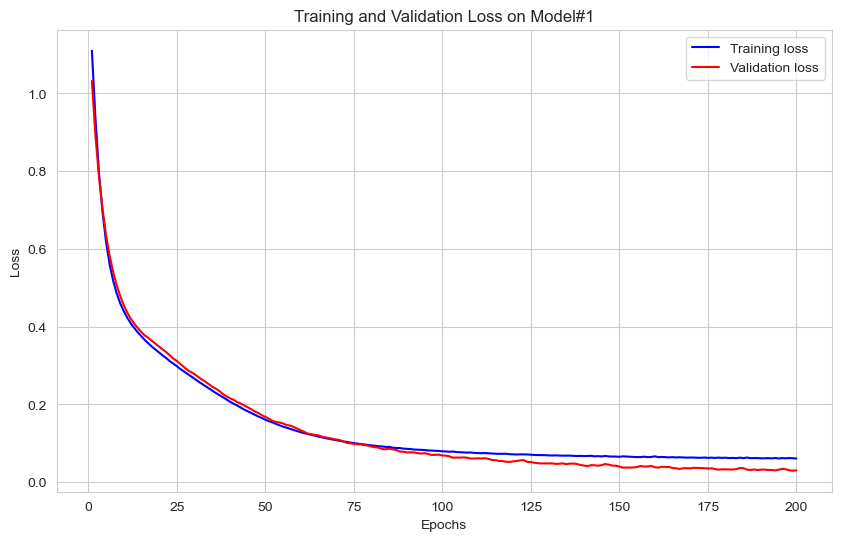

In [23]:
acc = history.history['loss']
val_acc = history.history['val_loss']
epochs = range(1, len(acc) + 1)

sns.set_style("whitegrid") 

plt.figure(figsize=(10, 6)) 
plt.plot(epochs, acc, 'b', label='Training loss')
plt.plot(epochs, val_acc, 'r', label='Validation loss')
plt.title('Training and Validation Loss on Model#1')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [24]:
model1 = models.Sequential()
model1.add(layers.Dense(64, activation='tanh',input_dim=4,kernel_regularizer=regularizers.l1(0.005)))
model1.add(layers.Dropout(0.2))
model1.add(layers.Dense(32, activation='tanh',kernel_regularizer=regularizers.l1(0.005)))
model1.add(layers.Dropout(0.2))
model1.add(layers.Dense(3, activation='softmax',kernel_regularizer=regularizers.l1(0.005)))

In [25]:
model1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,499 (9.76 KB)

 Trainable params: 2,499 (9.76 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model1.fit(x_train_scaled, y_train,epochs=200, validation_split=0.2)

Epoch 1/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5885 - loss: 2.3793 - val_accuracy: 0.7500 - val_loss: 2.3091
Epoch 2/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6432 - loss: 2.2955 - val_accuracy: 0.7917 - val_loss: 2.2168
Epoch 3/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7188 - loss: 2.2012 - val_accuracy: 0.8333 - val_loss: 2.1468
Epoch 4/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6836 - loss: 2.1787 - val_accuracy: 0.8333 - val_loss: 2.0898
Epoch 5/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7969 - loss: 2.0912 - val_accuracy: 0.8333 - val_loss: 2.0409
Epoch 6/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7708 - loss: 2.0365 - val_accuracy: 0.8333 - val_loss: 1.9978
Epoch 7/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8034 - loss: 1.9781 - val_accuracy: 0.8333 - val_loss: 1.9604
Epoch 8/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8333 - loss: 1.9124 - val_accuracy: 0.8333 - val_loss: 1.9268

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9479 - loss: 1.0584 - val_accuracy: 0.9167 - val_loss: 1.0687
Epoch 53/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9076 - loss: 1.0650 - val_accuracy: 0.9167 - val_loss: 1.0537
Epoch 54/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9102 - loss: 1.0418 - val_accuracy: 0.9167 - val_loss: 1.0393
Epoch 55/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9492 - loss: 1.0306 - val_accuracy: 0.9583 - val_loss: 1.0254
Epoch 56/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9544 - loss: 1.0150 - val_accuracy: 0.9583 - val_loss: 1.0126
Epoch 57/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9297 - loss: 0.9961 - val_accuracy: 0.9583 - val_loss: 0.9992
Epoch 58/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9375 - loss: 0.9690 - val_accuracy: 0.9583 - val_loss: 0.9855
Epoch 59/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9701 - loss: 0.9516 - val_accuracy: 0.9583 - val_loss: 0.9723
Epoch

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9401 - loss: 0.6241 - val_accuracy: 0.9583 - val_loss: 0.6199
Epoch 104/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9779 - loss: 0.6225 - val_accuracy: 0.9583 - val_loss: 0.6178
Epoch 105/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9805 - loss: 0.6213 - val_accuracy: 0.9583 - val_loss: 0.6137
Epoch 106/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9609 - loss: 0.6086 - val_accuracy: 0.9583 - val_loss: 0.6088
Epoch 107/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9661 - loss: 0.6078 - val_accuracy: 0.9583 - val_loss: 0.6046
Epoch 108/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9518 - loss: 0.6103 - val_accuracy: 0.9583 - val_loss: 0.6012
Epoch 109/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9688 - loss: 0.5887 - val_accuracy: 0.9583 - val_loss: 0.5983
Epoch 110/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9466 - loss: 0.6093 - val_accuracy: 0.9583 - val_loss: 0.594

Epoch 154/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9401 - loss: 0.5049 - val_accuracy: 1.0000 - val_loss: 0.4942
Epoch 155/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9401 - loss: 0.5174 - val_accuracy: 1.0000 - val_loss: 0.4918
Epoch 156/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9505 - loss: 0.5134 - val_accuracy: 1.0000 - val_loss: 0.4895
Epoch 157/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9727 - loss: 0.4811 - val_accuracy: 1.0000 - val_loss: 0.4866
Epoch 158/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9375 - loss: 0.5079 - val_accuracy: 1.0000 - val_loss: 0.4843
Epoch 159/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9688 - loss: 0.4912 - val_accuracy: 1.0000 - val_loss: 0.4835
Epoch 160/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9661 - loss: 0.4943 - val_accuracy: 1.0000 - val_loss: 0.4817
Epoch 161/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9779 - loss: 0.4958 - val_accuracy: 1.0000 - v

In [27]:
test_loss, test_acc = model1.evaluate(x_test_scaled, y_test)
print(f'Test accuracy: {test_acc}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 0.4139
Test accuracy: 1.0


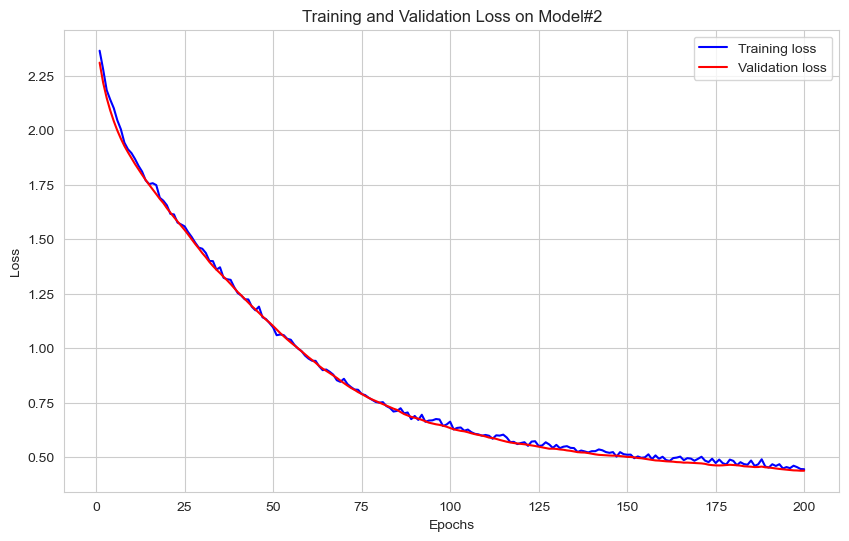

In [28]:
acc = history.history['loss']
val_acc = history.history['val_loss']
epochs = range(1, len(acc) + 1)

sns.set_style("whitegrid") 

plt.figure(figsize=(10, 6)) 
plt.plot(epochs, acc, 'b', label='Training loss')
plt.plot(epochs, val_acc, 'r', label='Validation loss')
plt.title('Training and Validation Loss on Model#2')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [29]:
predictions = model1.predict(x_test_scaled)
predicted_labels = np.argmax(predictions, axis=1)

# Show actual predictions
print("Predicted labels for the test set:", predicted_labels)
print()
print("True Labels:", y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted labels for the test set: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]

True Labels:      Species_Iris-setosa  Species_Iris-versicolor  Species_Iris-virginica
73                     0                        1                       0
18                     1                        0                       0
118                    0                        0                       1
78                     0                        1                       0
76                     0                        1                       0
31                     1                        0                       0
64                     0                        1                       0
141                    0                        0                       1
68                     0                        1                       0
82                     0                        1                       0
110                    0             